<a href="https://colab.research.google.com/github/Ankush11-hash/simple-_project/blob/master/Supervised_Classification_Algos_Comaprison_over_Iris_Datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Do a Comparative Analysis and accuracy of Training  & Test Data using Decision Tree, Random Forest, Naive Bayes, KNN & SVM Model 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/payutech/PlantAnalytics/master/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df.drop('Id',axis=1,inplace=True)

In [5]:
le = LabelEncoder()
df['Types'] =le.fit_transform(df['Species'])


ohe = OneHotEncoder(handle_unknown='ignore')
enc= pd.DataFrame(ohe.fit_transform(df[['Types']]).toarray())
df = df.join(enc)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Types,0,1,2
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,Iris-virginica,2,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2,0.0,0.0,1.0


In [6]:
features = ['SepalLengthCm',  'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[features]
y = df['Types']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.30,random_state=0)
print('X_train.shape {}\nX_test.shape {}\ny_train {} \ny_test.shape {}'.format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))
scores = []

models = {'Algo':['KNN','RandomForestClassifier','Decision_Tree','SVM','Naive_Bayes'],'Score':[]}


X_train.shape (105, 4)
X_test.shape (45, 4)
y_train (105,) 
y_test.shape (45,)


# K Nearest neighbor

In [0]:
metric = ['euclidean','manhattan','minkowski']
n_neighbors = range(1,25)
weights = ['uniform','distance'] 
kfd = KFold(n_splits=10)
grid = dict(metric=metric,n_neighbors=n_neighbors,weights=weights)
nearest = KNeighborsClassifier()
grid_search = GridSearchCV(nearest,cv=kfd,param_grid=grid)


grid_search.fit(X_train,y_train)
model_knn = grid_search.best_estimator_


In [8]:
model_knn# here we received a best tunned parametrs for the model which will cetainly avoid overfitting of the data
model_knn.score(X_train,y_train)

0.9619047619047619

In [9]:
yhat1 =model_knn.predict(X_test)
x = accuracy_score(yhat1,y_test)
models['Score'].append(x)
accuracy_score(yhat1,y_test)

0.9777777777777777

# **RandomForestClassifier**

In [10]:
rnd  = RandomForestClassifier(random_state=0)
rnd.fit(X_train,y_train)
yhat = rnd.predict(X_test)
accuracy_score(yhat,y_test)
# this is a case of over fitting, we could run grid search and tune the hyperparameters

0.9777777777777777

In [11]:
from sklearn.model_selection import GridSearchCV
n_estimator = [5,10,50,10,1000]
max_features = ['sqrt','log']
kfd = KFold(n_splits=10,random_state=1)
grid = dict(n_estimators=n_estimator,max_features=max_features)
grid_S = GridSearchCV(estimator=rnd,param_grid=grid,scoring='accuracy',cv=kfd)

grid_S.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_sco

In [12]:
model_rnd= grid_S.best_estimator_ # chosing te best hyperparameters
model_rnd

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
yhat2 = model_rnd.predict(X_test)
models['Score'].append((accuracy_score(yhat2,y_test)))

In [14]:
accuracy_score(yhat2,y_test)

0.9777777777777777

# **Decision Trees**

In [15]:
clf = DecisionTreeClassifier()
kfold = KFold(n_splits=10,random_state=1)
max_depth = [2,4,6,8,12]
max_features = ['sqrt','log','auto']
criterion = ['gini','entropy']
grid_dict= dict(max_depth = max_depth,max_features=max_features,criterion=criterion)

grid = GridSearchCV(clf,param_grid=grid_dict,cv=kfd,scoring='accuracy')
model = grid.fit(X_train,y_train)
model_dt = model.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection

In [0]:
yhat3 = model_dt.predict(X_test)
models['Score'].append(accuracy_score(yhat3,y_test))

# SVM(Support vector Machine)

In [17]:
clf_svm = SVC()
kfold = KFold(n_splits=10)
pra = dict(C=[.1,1,10,100,1000],kernel=['rbf'],degree=[2,3,4,5],gamma= [1,.1,.01,.001,.0001])
grid = GridSearchCV(clf_svm,param_grid=pra,cv=kfold)
grid.fit(X_train,y_train)
model_svm = grid.best_estimator_
model_svm.fit(X_train,y_train)
print('score',model.score(X_train,y_train))

score 1.0


In [0]:

yhat4 = model_svm.predict(X_test)
accuracy_score(yhat,y_test)
# certainly is performing good.
models['Score'].append(accuracy_score(yhat4,y_test))

In [19]:
models

{'Algo': ['KNN',
  'RandomForestClassifier',
  'Decision_Tree',
  'SVM',
  'Naive_Bayes'],
 'Score': [0.9777777777777777,
  0.9777777777777777,
  0.9555555555555556,
  0.9777777777777777]}

In [0]:
knn = KNeighborsClassifier()
svc = SVC()
rnd = RandomForestClassifier()
tr = DecisionTreeClassifier()
li = [knn,svc,rnd,tr]

li2 = [model_knn,model_svm,model_dt,model_rnd]

In [0]:
analysis = {'model':['model_knn','model_svm','model_dt','model_rnd'],'training_acc':[],'prediction_acc':[]}
for i in li2:
  i.fit(X_train,y_train)
  analysis['training_acc'].append(i.score(X_train,y_train))
  yhat = i.predict(X_test)
  analysis['prediction_acc'].append(accuracy_score(yhat,y_test))
  

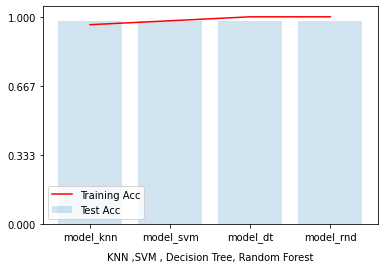

In [22]:
#performance of the models
plt.plot(analysis['model'],analysis['training_acc'],color='r',label='Training Acc')
plt.legend()
plt.xlabel('KNN ,SVM , Decision Tree, Random Forest',labelpad=10)
plt.bar(analysis['model'],analysis['prediction_acc'],alpha=.2,label='Test Acc')
plt.legend()
plt.yticks(ticks=np.linspace(0,1,4))
plt.show()

# Classification Report

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
pred = [yhat1,yhat2,yhat3,yhat4]
name = ['model_knn','model_svm','model_dt','model_rnd']

for i,j in zip(pred,name):
  print('{} report'.format(j))
  
  print(classification_report(i,y_test))
  print(confusion_matrix(i,y_test))
  print('\n\n')

model_knn report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]



model_svm report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]



model_dt report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16